# Layouts versus drawings of wiring diagrams


In Catlab, layout and drawing (rendering) of wiring diagrams are mostly
decoupled. This notebook shows how to lay out diagrams using Graphviz's
rank-based layout or Catlab's series-parallel layout and then render them
using Compose.jl or TikZ.

The morphism we will visualize is:

In [1]:
using Catlab.Theories

X = Ob(FreeSymmetricMonoidalCategory, :X)
f, g, h = (Hom(sym, X, X) for sym in (:f, :g, :h))

expr = otimes(f, compose(f,g), compose(f,g,h))

f⊗(f⋅g)⊗(f⋅g⋅h): X⊗X⊗X → X⊗X⊗X

Let's convert this expression into a wiring diagram. This yields a purely
combinatorial object, as evidenced by its underlying graph.

In [2]:
using Catlab.WiringDiagrams, Catlab.Graphics

diagram = to_wiring_diagram(expr)
WiringDiagrams.graph(diagram)

Catlab.WiringDiagrams.DirectedWiringDiagrams.WiringDiagramGraphACSet{Int64} with elements V = 1:8, E = 1:9
┌───┬─────┐
│ V │ box │
├───┼─────┤
│ 1 │   1 │
│ 2 │   2 │
│ 3 │   3 │
│ 4 │   4 │
│ 5 │   5 │
│ 6 │   6 │
│ 7 │  -2 │
│ 8 │  -1 │
└───┴─────┘
┌───┬─────┬─────┬──────┐
│ E │ src │ tgt │ wire │
├───┼─────┼─────┼──────┤
│ 1 │   2 │   3 │    1 │
│ 2 │   5 │   6 │    2 │
│ 3 │   4 │   5 │    3 │
│ 4 │   7 │   1 │    1 │
│ 5 │   7 │   2 │    2 │
│ 6 │   7 │   4 │    3 │
│ 7 │   1 │   8 │    1 │
│ 8 │   3 │   8 │    2 │
│ 9 │   6 │   8 │    3 │
└───┴─────┴─────┴──────┘

## Graphviz layout

Calling `to_graphviz` both lays out and draws the diagram, entirely within
Graphviz.

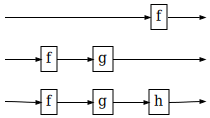

In [3]:
to_graphviz(diagram, orientation=LeftToRight)

To get just the layout from Graphviz, we call `graphviz_layout` instead. We
can then render this layout using Compose.jl. Note that the Graphviz layout
has units in points.

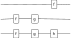

In [4]:
import Compose

layout = graphviz_layout(diagram, orientation=LeftToRight)
layout_to_composejl(layout, base_unit=Compose.pt)

The same layout can be rendered in TikZ:

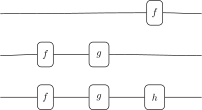

In [5]:
import TikzPictures

layout_to_tikz(layout, base_unit="1pt")

## Series-parallel layout

Catlab has its own layout system based on series-parallel decomposition. In
this case, the layout exactly recovers the structure of the morphism
expression created at the beginning.

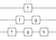

In [6]:
layout = layout_diagram(FreeSymmetricMonoidalCategory, diagram,
                        orientation=LeftToRight)
layout_to_composejl(layout)

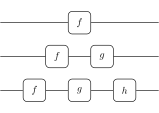

In [7]:
layout_to_tikz(layout)